## Unsupervised ML (Clustering)

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 words.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

#### Question 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful A
   rataset

for performing unsupervise learning we will load IPC Crime Dataset

In [133]:
ipc_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\01_District_wise_crimes_committed_IPC_2001_2012.csv',encoding='latin1')

In [134]:
ipc_crime_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [136]:
ipc_crime_df.shape

(9017, 33)



"We found that there is a 'Total' value present in the district column, so we will exclude the datofth 'Total'."

In [137]:
df= ipc_crime_df[ipc_crime_df['DISTRICT']!='TOTAL']

In [138]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [139]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

we will take data 'TOTAL IPC CRIMES' for input data

In [140]:
df_new=df.iloc[:,-1:]

In [141]:
df_new.head()

,TOTAL IPC CRIMES
0,4154
1,4125
2,5818
3,3140
4,6507



"We will be performing clustering as mentioned in the problem statement for 3 clusters, so we will be taking the `n_clusters` value as 3."

In [142]:
from sklearn.cluster import KMeans

In [143]:
kmeans= KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(df_new)
print(y_kmeans)

[1 1 1 ... 0 0 1]


In [144]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1])

In [145]:
df_new[y_kmeans==0]

,TOTAL IPC CRIMES
3,3140
5,287
19,439
20,2572
22,320
...,...
9002,1057
9003,2700
9010,6
9012,60


In [146]:
df_new[y_kmeans==0].max()

TOTAL IPC CRIMES    3389
dtype: int64

In [147]:
df_new[y_kmeans==0].min()

TOTAL IPC CRIMES    0
dtype: int64

- We notice that in group 0, which is the first cluster, the maximum crime value is 3,389 and the minimum crime value is 0. 

In [148]:
df_new[y_kmeans==1]

,TOTAL IPC CRIMES
0,4154
1,4125
2,5818
4,6507
6,7848
...,...
9007,5045
9008,7040
9009,4085
9011,5558


In [149]:
df_new[y_kmeans==1].max()

TOTAL IPC CRIMES    11486
dtype: int64

In [150]:
df_new[y_kmeans==1].min()

TOTAL IPC CRIMES    3391
dtype: int64

We notice that in group 1, which is the second cluster, the maximum crime value is 11486 and the minimum crime value is 3391.

In [151]:
df_new[y_kmeans==2]

,TOTAL IPC CRIMES
7,11831
139,13496
255,27254
288,14843
307,13708
...,...
8953,11765
8954,14370
8971,25370
8973,12713


In [152]:
df_new[y_kmeans==2].max()

TOTAL IPC CRIMES    34638
dtype: int64

In [153]:
df_new[y_kmeans==2].min()

TOTAL IPC CRIMES    11765
dtype: int64

We notice that in group 2, which is the third cluster, the maximum crime value is 34,638 and the minimum crime value is 11765.

Based on the observed data, we can draw the following conclusions about the different clusters:

1. **Group 0 (First Cluster)**:
   - **Maximum Crime Value**: 3,389
   - **Minimum Crime Value**: 0
   - **Assumption**: All districts in this cluster are in peaceful areas.

2. **Group 1 (Third Cluster)**:
   - **Maximum Crime Value**: 11,486
   - **Minimum Crime Value**: 3,391
   - **Assumption**: All districts in this cluster are in moderate areas.
     
3. **Group 2 (Second Cluster)**:
   - **Maximum Crime Value**: 34,638
   - **Minimum Crime Value**: 11,765
   - **Assumption**: All districts in this cluster are in sensitive areas.

### Question 4.2  Create DataFrame for each cluster that shows data according to the areas

In [154]:
df['Cluster_group']=pd.DataFrame(data=kmeans.labels_)

In [155]:
# Replace the cluster values with meaningful names
df['Cluster_group'] = df['Cluster_group'].replace({0: 'Peaceful Area', 1:'Moderate Area', 2:'Sensitive Area' })

In [156]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster_group
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,Moderate Area
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,Moderate Area
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,Moderate Area
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,Peaceful Area
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,Moderate Area


**Creating DataFrame for sensitive area's data**

In [157]:
sensitive_area_data=df[df['Cluster_group']=='Sensitive Area']

In [158]:
sensitive_area_data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster_group
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,3137,24,118,27,746,0,409,1512,11831,Sensitive Area
133,CHHATTISGARH,RAJNANDGAON,2001,36,27,0,58,0,58,4,...,142,3,92,12,51,0,0,1601,2650,Sensitive Area
244,JHARKHAND,KODERMA,2001,21,18,1,2,0,2,14,...,18,11,8,1,29,0,45,251,667,Sensitive Area
276,KARNATAKA,MANDYA,2001,67,47,3,15,0,15,9,...,1431,7,50,0,72,0,0,2234,4807,Sensitive Area
294,KERALA,KOZHIKODE,2001,34,35,8,39,0,39,12,...,1035,2,118,8,319,0,0,4012,8394,Sensitive Area


**Creating DataFrame for moderate area's data**

In [159]:
moderate_area_data=df[df['Cluster_group']=='Moderate Area']

In [160]:
moderate_area_data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster_group
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,Moderate Area
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,Moderate Area
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,Moderate Area
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,Moderate Area
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,1792,7,139,129,378,0,369,2426,7848,Moderate Area


**Creating DataFrame for peaceful area's data**

In [161]:
peaceful_area_data=df[df['Cluster_group']=='Peaceful Area']

In [162]:
peaceful_area_data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster_group
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,Peaceful Area
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,1,0,0,0,4,104,287,Peaceful Area
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,0,0,...,17,1,0,1,0,0,6,68,439,Peaceful Area
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,4,8,0,8,12,...,679,6,38,47,108,0,167,926,2572,Peaceful Area
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,0,1,0,1,0,...,9,0,1,1,0,0,2,25,320,Peaceful Area


#### Question 4.3 :- Analyze your clusters and prepare a report that explains all your observations. 

#### Analysing All Cluster

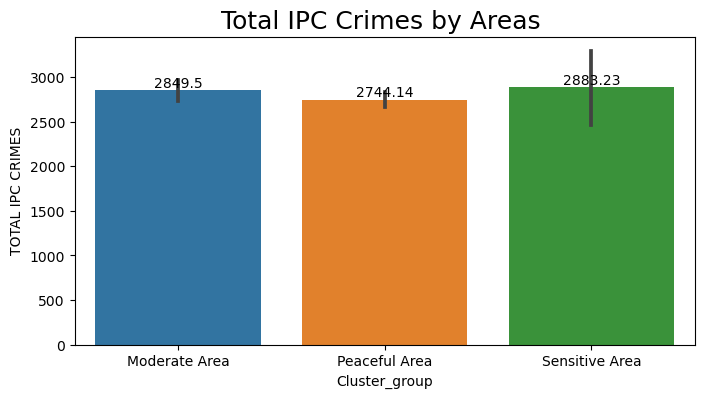

In [163]:
sort_icp=df.sort_values(by='TOTAL IPC CRIMES', ascending=False)
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=sort_icp, x='Cluster_group', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Total IPC Crimes by Areas ', fontsize=18)
plt.show()

Maxmim data is related to sensitive area's .

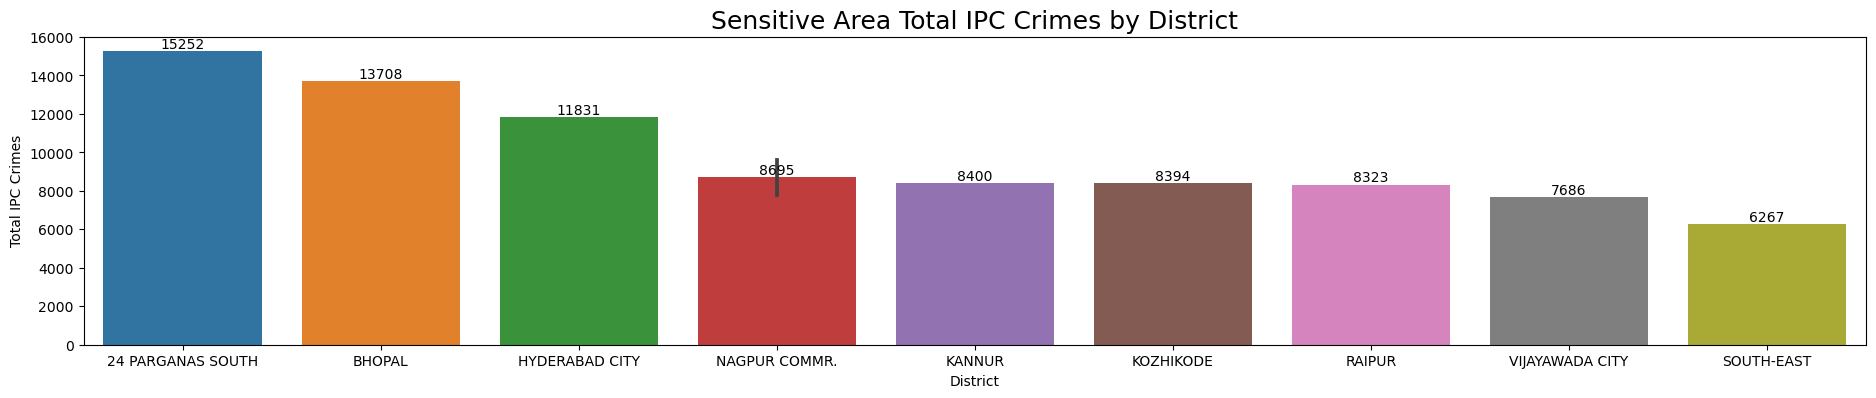

In [164]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
top_10_sensitive_areas = sensitive_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=top_10_sensitive_areas, x='DISTRICT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Sensitive Area Total IPC Crimes by District', fontsize=18)
plt.xlabel('District')  # Optionally add x-axis label
plt.ylabel('Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

From the above graph, we can observe that the highest moderate area is 24 Parganas south district, which has a value of 15,252, followed by Bhopal,Murshidabad, Alwar, and so on.

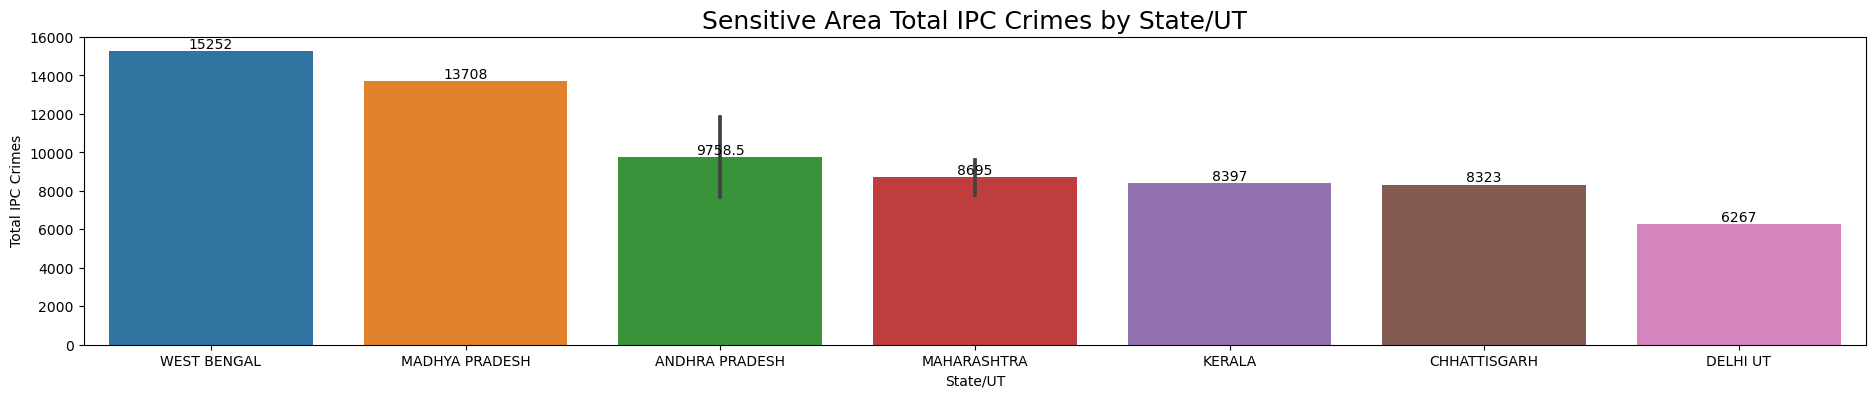

In [165]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
top_10_sensitive_areas = sensitive_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=top_10_sensitive_areas, x='STATE/UT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Sensitive Area Total IPC Crimes by State/UT', fontsize=18)
plt.xlabel('State/UT')  # Optionally add x-axis label
plt.ylabel('Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

From the above graph, we can observe that the highest moderate area is West Bengal. followed by Madhya Pradesh, Rajasthan, and so on.

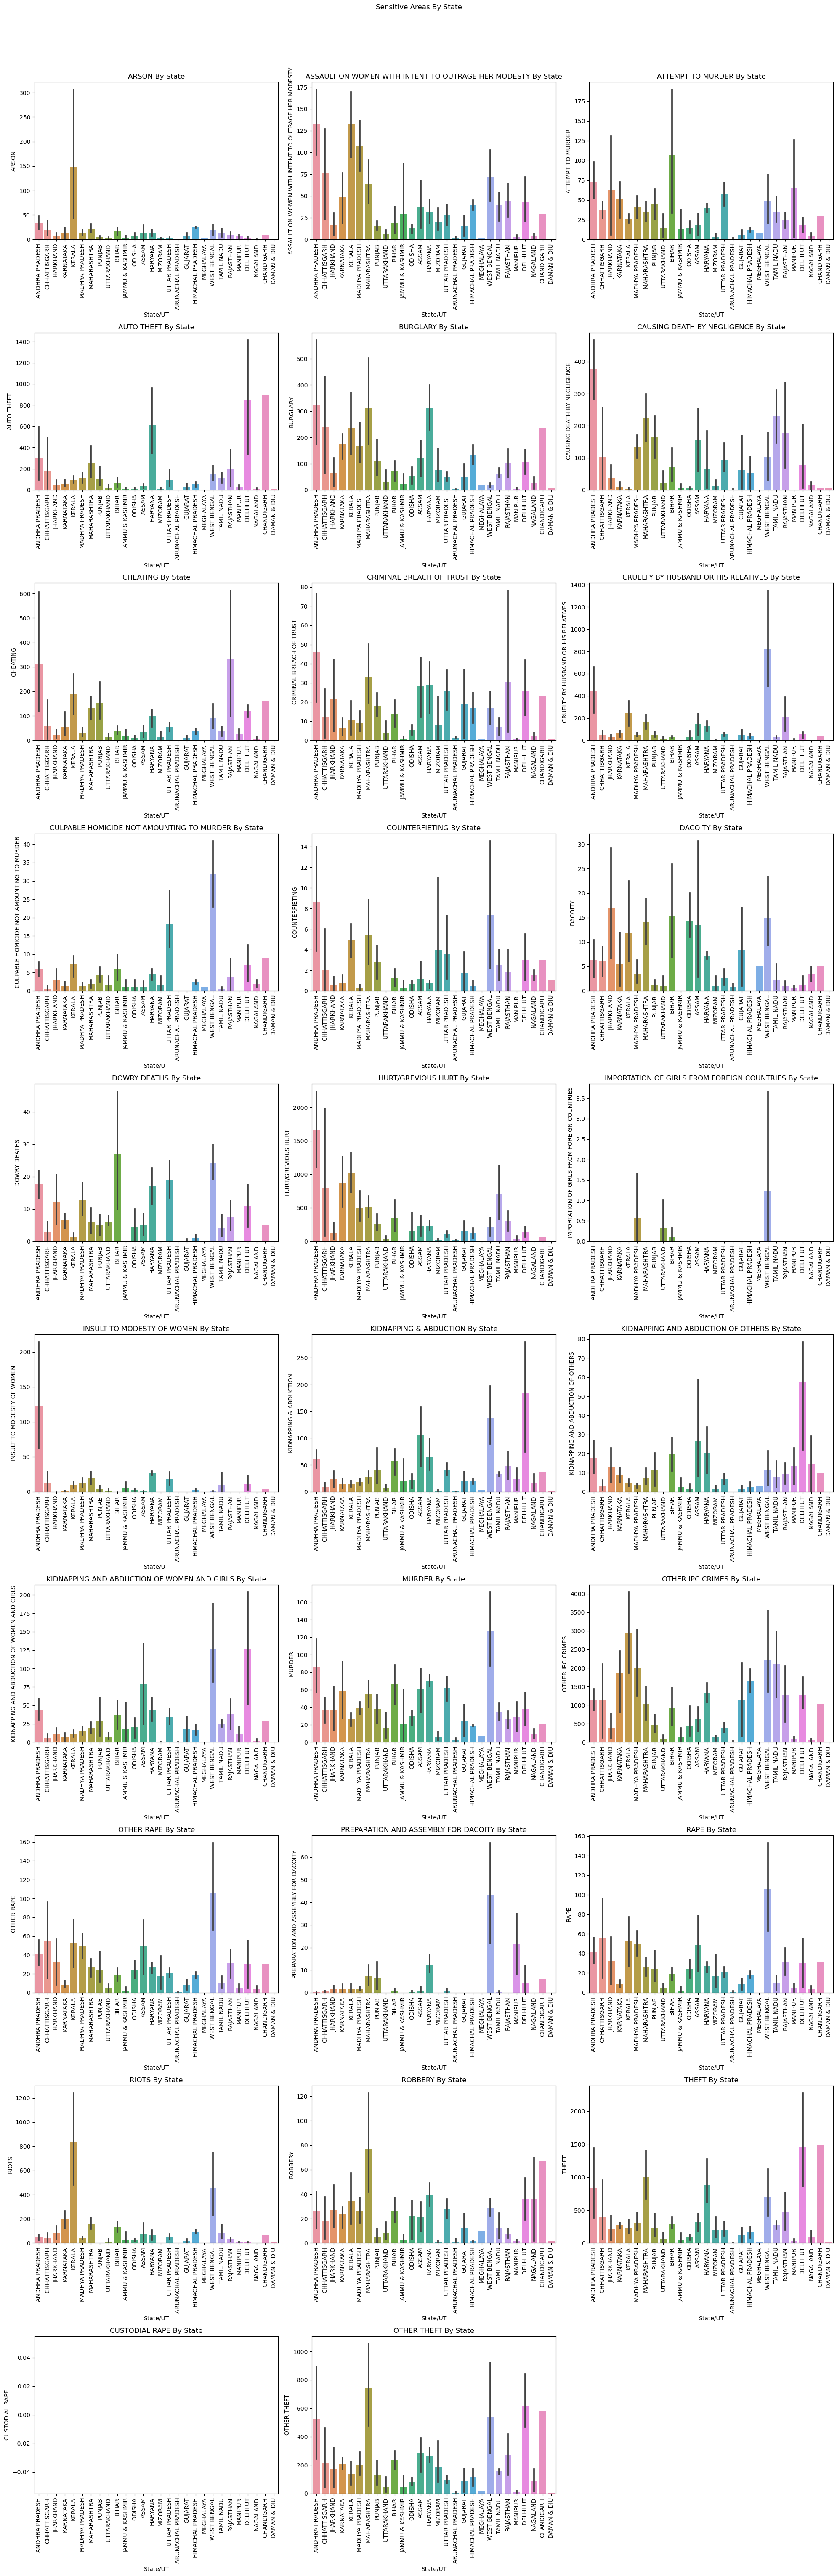

In [166]:
# List of crime categories in ascending order
crime_categories = [
    'ARSON', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'ATTEMPT TO MURDER', 'AUTO THEFT', 'BURGLARY', 'CAUSING DEATH BY NEGLIGENCE',
    'CHEATING', 'CRIMINAL BREACH OF TRUST', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'COUNTERFIETING', 'DACOITY',
    'DOWRY DEATHS', 'HURT/GREVIOUS HURT', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'INSULT TO MODESTY OF WOMEN', 'KIDNAPPING & ABDUCTION',
    'KIDNAPPING AND ABDUCTION OF OTHERS', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'MURDER', 'OTHER IPC CRIMES', 'OTHER RAPE', 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'RAPE', 'RIOTS', 'ROBBERY', 'THEFT', 'CUSTODIAL RAPE', 'OTHER THEFT'
]

# Assuming 'sensitive_area_data' is your DataFrame containing crime data by state/UT and crime categories

# Set up the number of rows and columns for subplots
num_rows = (len(crime_categories) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each crime category
for idx, crime in enumerate(crime_categories):
    sns.barplot(data=sensitive_area_data, x='STATE/UT', y=crime, ax=axes[idx])
    axes[idx].set_title(f'{crime} By State')
    axes[idx].set_xlabel('State/UT')
    axes[idx].set_ylabel(crime)
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Remove empty subplots
for i in range(len(crime_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('Sensitive Areas By State', y=1.02)  # Title above subplots
plt.tight_layout()
plt.show()

### Analysis and Insights for the Sensitive areas

### 1. Impact of Specific Crimes in Sensitive Areas

The bar plots reveal significant impacts of specific crimes in sensitive areas:

- **Dowry Deaths**: States like Uttar Pradesh, Bihar, and West Bengal show high numbers.
- **Hurt/Grievous Hurt**: Uttar Pradesh, Maharashtra, and Madhya Pradesh have high incidents.
- **Importation of Girls**: Assam shows a noticeable number, indicating trafficking issues.
- **Insult to Modesty of Women**: Maharashtra, West Bengal, and Uttar Pradesh report high numbers.
- **Kidnapping and Abduction**: Uttar Pradesh, Maharashtra, and West Bengal are prominent.
- **Murder**: Uttar Pradesh, Bihar, and Maharashtra have high murder rates.
- **Other IPC Crimes**: High numbers in states like Uttar Pradesh, Maharashtra, and West Bengal.
- **Rape**: Rajasthan, Uttar Pradesh, and Madhya Pradesh report significant incidents.
- **Assault on Women**: Uttar Pradesh, Maharashtra, and West Bengal have high rates.

### 2. Recommendations to Reduce Crime

To address and reduce crime in these sensitive areas, the following measures should be considered:

1. **Enhanced Law Enforcement:**
   - Increase police presence and patrolling in high-crime areas.
   - Establish special task forces to tackle specific crimes like trafficking, rape, and abduction.

2. **Community Engagement:**
   - Engage community leaders and local organizations to foster community policing.
   - Conduct awareness programs and workshops on crime prevention and safety.

3. **Strengthening Legal Framework:**
   - Implement stricter laws and penalties for severe crimes like dowry deaths, rape, and human trafficking.
   - Fast-track courts for quick resolution of criminal cases to ensure justice.

4. **Improving Socio-Economic Conditions:**
   - Address underlying socio-economic issues like poverty, unemployment, and lack of education that contribute to criminal activities.
   - Provide skill development and employment opportunities to vulnerable populations.

5. **Support for Victims:**
   - Establish support centers for victims of crimes to provide legal, medical, and psychological assistance.
   - Create helplines and online portals for reporting crimes and seeking help.

### 3. Most Safe and Unsafe Districts

Based on the visual analysis of the plots, the following can be inferred:

- **Most Unsafe Districts:**
  - **Uttar Pradesh** (various types of crimes like hurt, murder, kidnapping, assault on women)
  - **Maharashtra** (high in crimes like hurt, insult to modesty of women, and kidnapping)
  - **West Bengal** (notable in dowry deaths, kidnapping, and assault on women)


### 4. Which states show a high incidence of crimes against women?

- **Uttar Pradesh**: High in dowry deaths, insult to modesty of women, kidnapping and abduction, and rape.
- **Maharashtra**: Notable in hurt/grievous hurt, insult to modesty of women, and kidnapping.
- **West Bengal**: Significant in dowry deaths, kidnapping and abduction, and assault on women.

### 5. What are the trends in property crimes such as burglary and theft?

- **Auto Theft**: High in Delhi, Maharashtra, and Uttar Pradesh.
- **Burglary**: Uttar Pradesh, Maharashtra, and West Bengal have higher incidents.
- **Cheating and Criminal Breach of Trust**: High numbers in Maharashtra, Uttar Pradesh, and Delhi.

### 6. How do violent crimes like murder and attempted murder vary across states?

- **Murder**: Uttar Pradesh, Bihar, and Maharashtra report high murder rates.
- **Attempt to Murder**: Uttar Pradesh, Bihar, and Maharashtra also show high incidents.

### 7. Which states show significant incidences of economic crimes like cheating and criminal breach of trust?

- **Maharashtra**: High in cheating and criminal breach of trust.
- **Delhi**: Significant in both categories.
- **Uttar Pradesh**: Notable in both categories.

### 8. Are there any states with a notable problem with arson?

- **Assam** and **West Bengal**: Show higher incidences of arson.

### 9. What steps can be taken to address the high incidence of crimes in specific states?

- **Focused Law Enforcement Efforts**: States like Uttar Pradesh, Maharashtra, and West Bengal should enhance their law enforcement presence and adopt specialized units to tackle specific crimes.
- **Community Programs**: Engage local communities in crime prevention strategies and improve public awareness about crime reporting and safety measures.
- **Legislative Actions**: Strengthen laws related to violent crimes, economic crimes, and crimes against women to provide a stronger deterrent effect.

### 10. Which crimes show the highest variability across states?

- **Assault on Women with Intent to Outrage Modesty**: Shows significant variability with high numbers in Uttar Pradesh and Maharashtra.
- **Kidnapping and Abduction**: Considerable differences between states, with high incidences in Uttar Pradesh, Maharashtra, and West Bengal.
- **Rape**: High variability, with Rajasthan, Uttar Pradesh, and Madhya Pradesh showing significant incidents.

### 11. How do crimes related to organized efforts like dacoity and preparation for dacoity compare across states?

- **Preparation and Assembly for Dacoity**: High in Uttar Pradesh and Maharashtra.
- **Dacoity**: Significant in Uttar Pradesh and Madhya Pradesh.

### Conclusion

By identifying the states and districts with the highest crime rates and understanding the types of crimes prevalent in these areas, authorities can implement targeted measures to reduce crime and improve safety. Addressing socio-economic factors, enhancing law enforcement, and providing support to victims are crucial steps towards creating a safer environment for all residents. Targeted interventions are required in states with high crime rates, focusing on the most prevalent types of crimes in each state. For instance, states with high rates of crimes against women might benefit from enhanced legal protections and support systems for victims, while those with high property crime rates could improve surveillance and law enforcement efficiency. These insights provide a comprehensive view of the crime landscape across different states and help in formulating strategies to mitigate and address various criminal activities effectively.

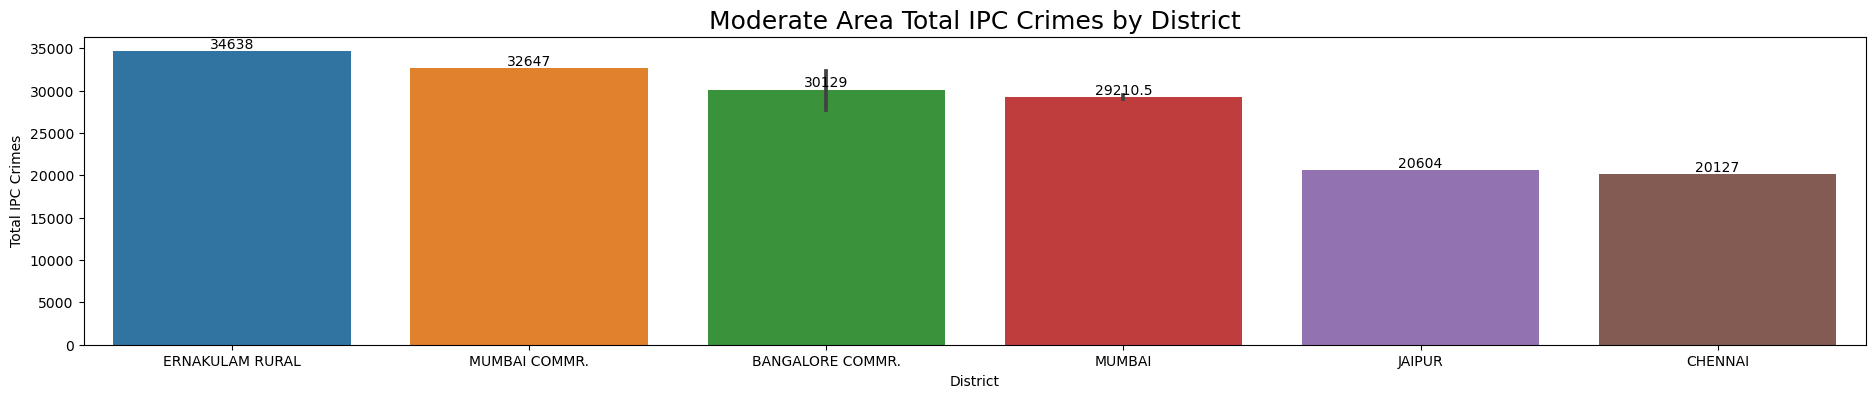

In [167]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
top_10_moderate_areas = moderate_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=top_10_moderate_areas, x='DISTRICT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Moderate Area Total IPC Crimes by District', fontsize=18)
plt.xlabel('District')  # Optionally add x-axis label
plt.ylabel('Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

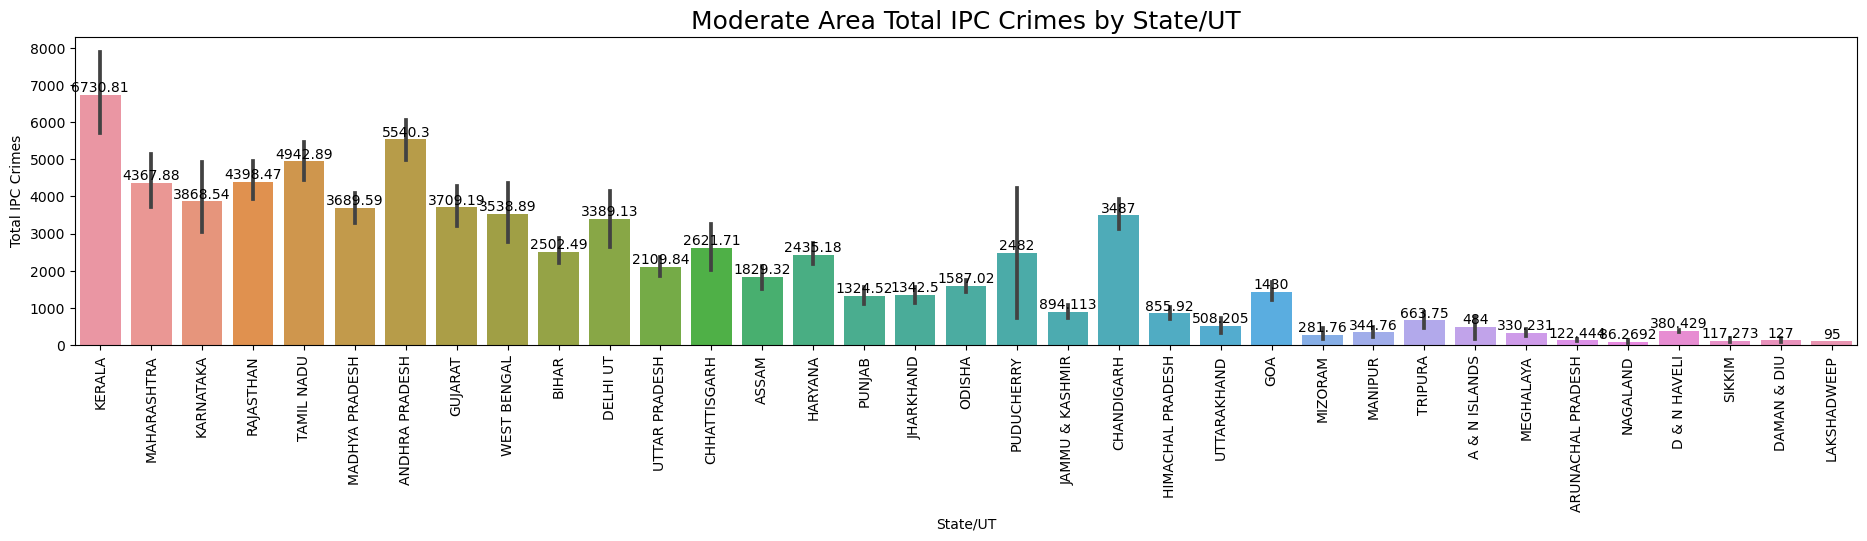

In [182]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
top_10_moderate_areas = moderate_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=top_10_moderate_areas, x='STATE/UT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Moderate Area Total IPC Crimes by State/UT', fontsize=18)
plt.xlabel('State/UT')  # Optionally add x-axis label
plt.ylabel('Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# List of crime categories in ascending order
crime_categories = [
    'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'
]

# Assuming 'Moderate_area_data' is your DataFrame containing crime data by state/UT and crime categories

# Set up the number of rows and columns for subplots
num_rows = (len(crime_categories) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each crime category
for idx, crime in enumerate(crime_categories):
    sns.barplot(data=moderate_area_data, x='STATE/UT', y=crime, ax=axes[idx])
    axes[idx].set_title(f'{crime} By State')
    axes[idx].set_xlabel('State/UT')
    axes[idx].set_ylabel(crime)
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Remove empty subplots
for i in range(len(crime_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('Moderate Areas By State', y=1.02,fontsize=14)  # Title above subplots
plt.tight_layout()
plt.show()



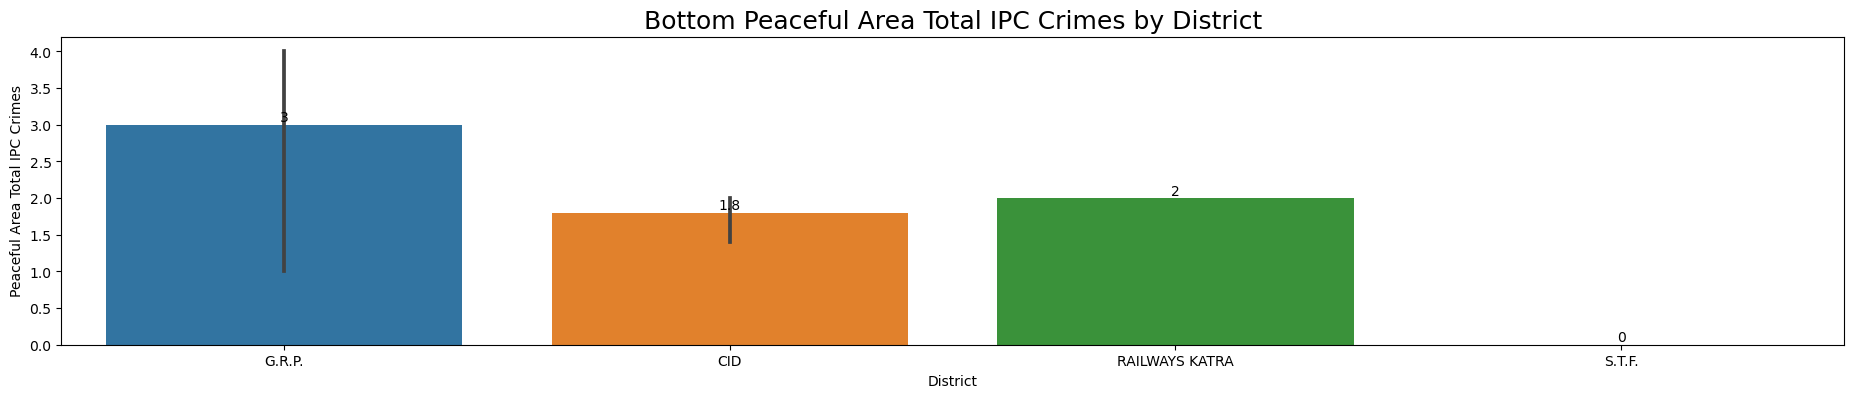

In [183]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
bottom_10_peaceful_areas =peaceful_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False).tail(10)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=bottom_10_peaceful_areas, x='DISTRICT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Bottom Peaceful Area Total IPC Crimes by District', fontsize=18)
plt.xlabel('District')  # Optionally add x-axis label
plt.ylabel('Peaceful Area Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

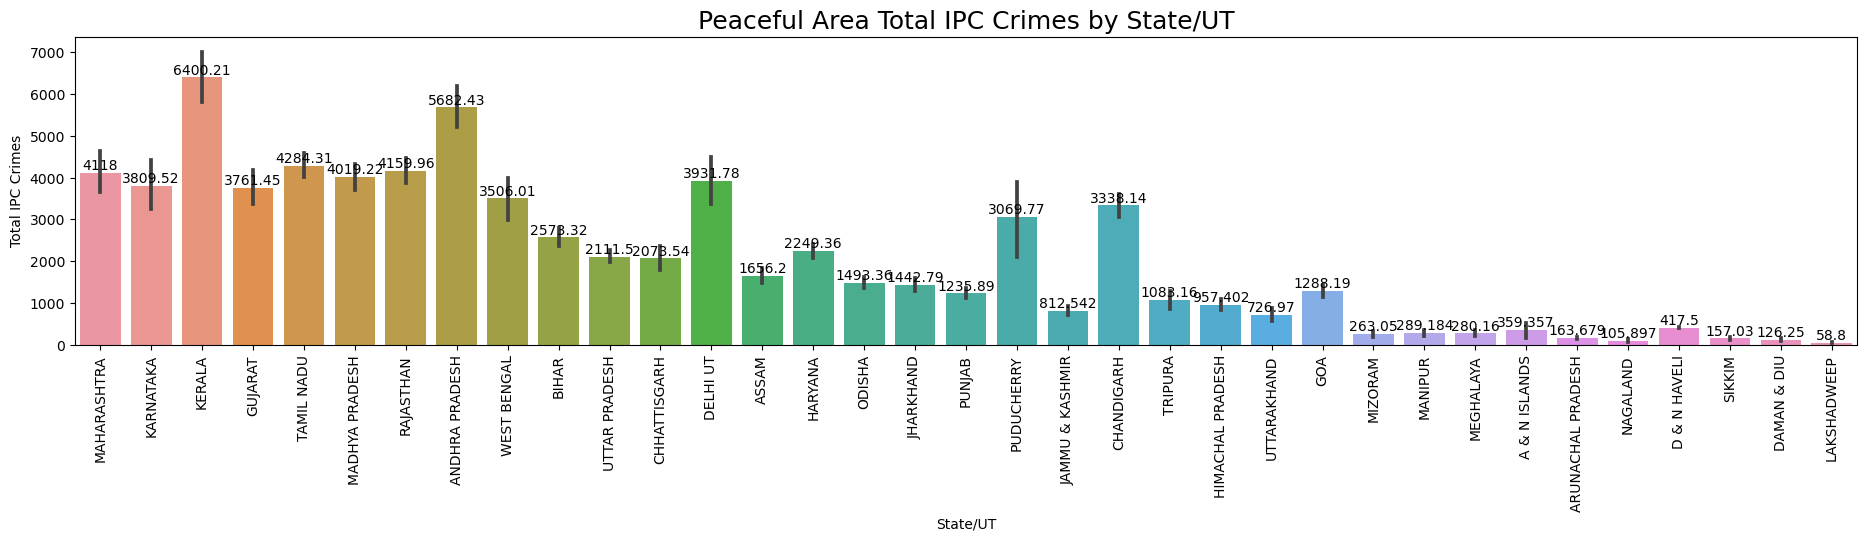

In [179]:
# Sort the DataFrame based on 'TOTAL IPC CRIMES' and select the top 10 results
bottom_10_peaceful_areas =peaceful_area_data.sort_values(by='TOTAL IPC CRIMES', ascending=False)

# Plotting the barplot for the top 10 districts
plt.figure(figsize=(23, 4))
ax = sns.barplot(data=bottom_10_peaceful_areas, x='STATE/UT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.title('Peaceful Area Total IPC Crimes by State/UT', fontsize=18)
plt.xlabel('State/UT')  # Optionally add x-axis label
plt.ylabel('Total IPC Crimes')  # Optionally add y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

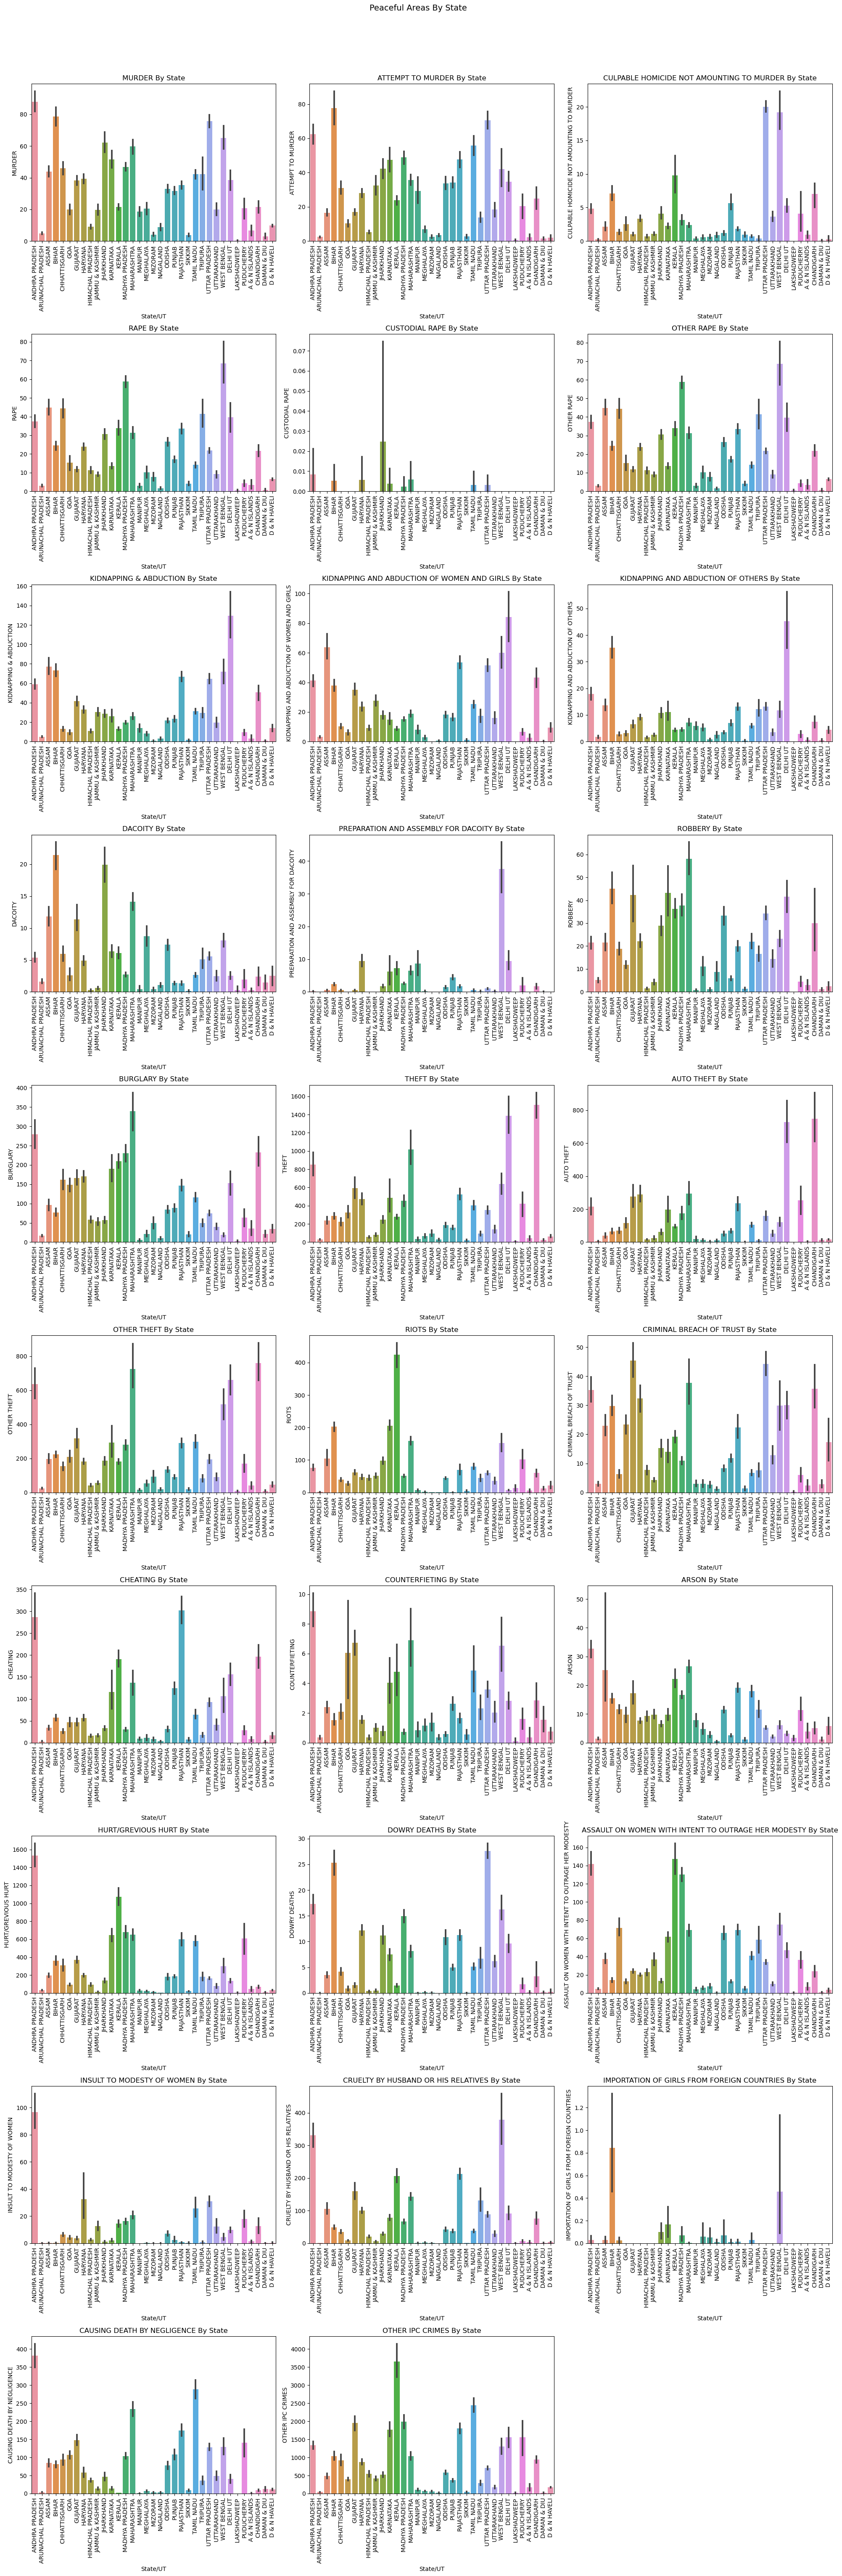

In [184]:
# List of crime categories in ascending order
crime_categories = [
    'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'
]

# Assuming 'Peaceful_area_data' is your DataFrame containing crime data by state/UT and crime categories

# Set up the number of rows and columns for subplots
num_rows = (len(crime_categories) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each crime category
for idx, crime in enumerate(crime_categories):
    sns.barplot(data=peaceful_area_data, x='STATE/UT', y=crime, ax=axes[idx])
    axes[idx].set_title(f'{crime} By State')
    axes[idx].set_xlabel('State/UT')
    axes[idx].set_ylabel(crime)
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Remove empty subplots
for i in range(len(crime_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('Peaceful Areas By State', y=1.02,fontsize=14)  # Title above subplots
plt.tight_layout()
plt.show()

From peaceful area visualization we can find out this insightes 

1. **State with Highest Cases of "Insult to Modesty of Women":**
   - The state with the highest number of cases of "Insult to Modesty of Women" is Maharashtra.

2. **State with Most Prevalent "Cruelty by Husband or his Relatives":**
   - Uttar Pradesh has the highest number of cases of "Cruelty by Husband or his Relatives".

3. **State with Lowest Cases of "Importation of Girls from Foreign Countries":**
   - Many states show zero cases for "Importation of Girls from Foreign Countries", indicating a low prevalence.

4. **States with Highest and Lowest Counts of "Causing Death by Negligence":**
   - Maharashtra has the highest count of cases, while several states have very low to negligible counts.

5. **Trend of "Other IPC Crimes" Across Various States:**
   - There is significant variability, with Maharashtra and Uttar Pradesh showing notably high counts.

6. **State with Highest Number of "Theft" Cases:**
   - Maharashtra records the highest number of "Theft" cases.

7. **State Where "Auto Theft" is Most Common:**
   - Delhi shows the highest number of "Auto Theft" cases.

8. **State with Highest Number of "Dowry Deaths":**
   - Uttar Pradesh has the highest number of "Dowry Deaths".

9. **Trend in "Assault on Women with Intent to Outrage her Modesty" Across States:**
   - There is a noticeable high number of cases in Maharashtra and Uttar Pradesh, with other states showing varying lower counts.

10. **State with Highest Count of "Murder" Cases:**
    - Uttar Pradesh records the highest number of "Murder" cases.

11. **State with Most Frequent "Kidnapping and Abduction of Women and Girls" Cases:**
    - Uttar Pradesh has the highest frequency of such cases.

12. **State with Most Commonly Reported "Rape" Cases:**
    - Madhya Pradesh shows the highest number of reported "Rape" cases.

13. **State with Highest Number of "Robbery" Cases:**
    - Maharashtra has the highest number of "Robbery" cases.

Understanding crime and its influencing factors involves examining multiple dimensions, particularly the legal framework and police behavior. Here's a structured breakdown:

### 1. **Legal Framework**
   - **Laws and Regulations**: The existence of specific laws defines what constitutes a crime. Different jurisdictions may have varying laws, affecting crime rates and types.
   - **Penalties and Enforcement**: The severity of penalties can deter or encourage criminal behavior. Strict laws may reduce crime, but excessive penalties might lead to issues such as over-policing or imprisonment without addressing root causes.
   - **Judicial System**: The efficiency and fairness of the judicial process influence public trust in law enforcement. A slow or biased system may lead to feelings of injustice, impacting community relations with police.

### 2. **Police Behavior**
   - **Community Policing**: A proactive approach where police engage with communities fosters trust and cooperation. This can lead to more effective crime prevention and reporting.
   - **Use of Force**: The perceived or actual use of excessive force can erode trust in law enforcement, leading to tensions and potential increases in crime, particularly in marginalized communities.
   - **Transparency and Accountability**: Communities that feel they can hold police accountable for misconduct tend to have better relations, which can enhance crime reporting and cooperation.
   - **Training and Resources**: Well-trained officers who understand community dynamics and cultural sensitivities are better equipped to handle situations effectively, potentially reducing conflict and crime.

### 3. **Socioeconomic Factors**
   - **Poverty and Unemployment**: High poverty and unemployment rates can lead to increased crime as individuals may resort to illegal activities for survival.
   - **Education and Opportunity**: Access to education and job opportunities can reduce crime by providing alternatives to illegal activities.
   - **Social Cohesion**: Strong community ties and social networks can deter crime, as communities are more likely to look out for one another and report suspicious behavior.

### 4. **Environmental Factors**
   - **Urban vs. Rural Areas**: Crime rates often differ between urban and rural settings due to population density, economic opportunities, and social dynamics.
   - **Neighborhood Design**: Well-lit, monitored areas with community spaces can deter crime, while isolated or poorly maintained areas may attract criminal activity.

### Working On Anti Corruption cases Data-2001 to 2010

In [3]:
anti_Corruption=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\23_Anti_corruprion_cases.csv',encoding='latin1')

In [4]:
anti_Corruption.columns

Index(['ï»¿Area_Name', 'Year',
       'AC01_No_of_cases_pending_investigation_from_previous_year',
       'AC02_No_of_cases_registered_during_the_year',
       'AC03_Total_No_of_cases_for_investigation_during_the_year',
       'AC04_No_of_cases_investigated_during_the_year',
       'AC05_No_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year',
       'AC06_No_of_cases_transferred_to_local_police_during_the_year',
       'AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature',
       'AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year',
       'AC09_No_of_cases_pending_departmental_sanction_for_prosecution_during_the_year',
       'AC10_No_of_cases_sent_up_for_trial_and_also_reported_for_departmental_action_during_the_year',
       'AC11_No_of_cases_reported_for_regular_departmental_action_during_the_year',
       'AC12_No_of_cases_reported_for_suitable_action_during_the_year',
       'A

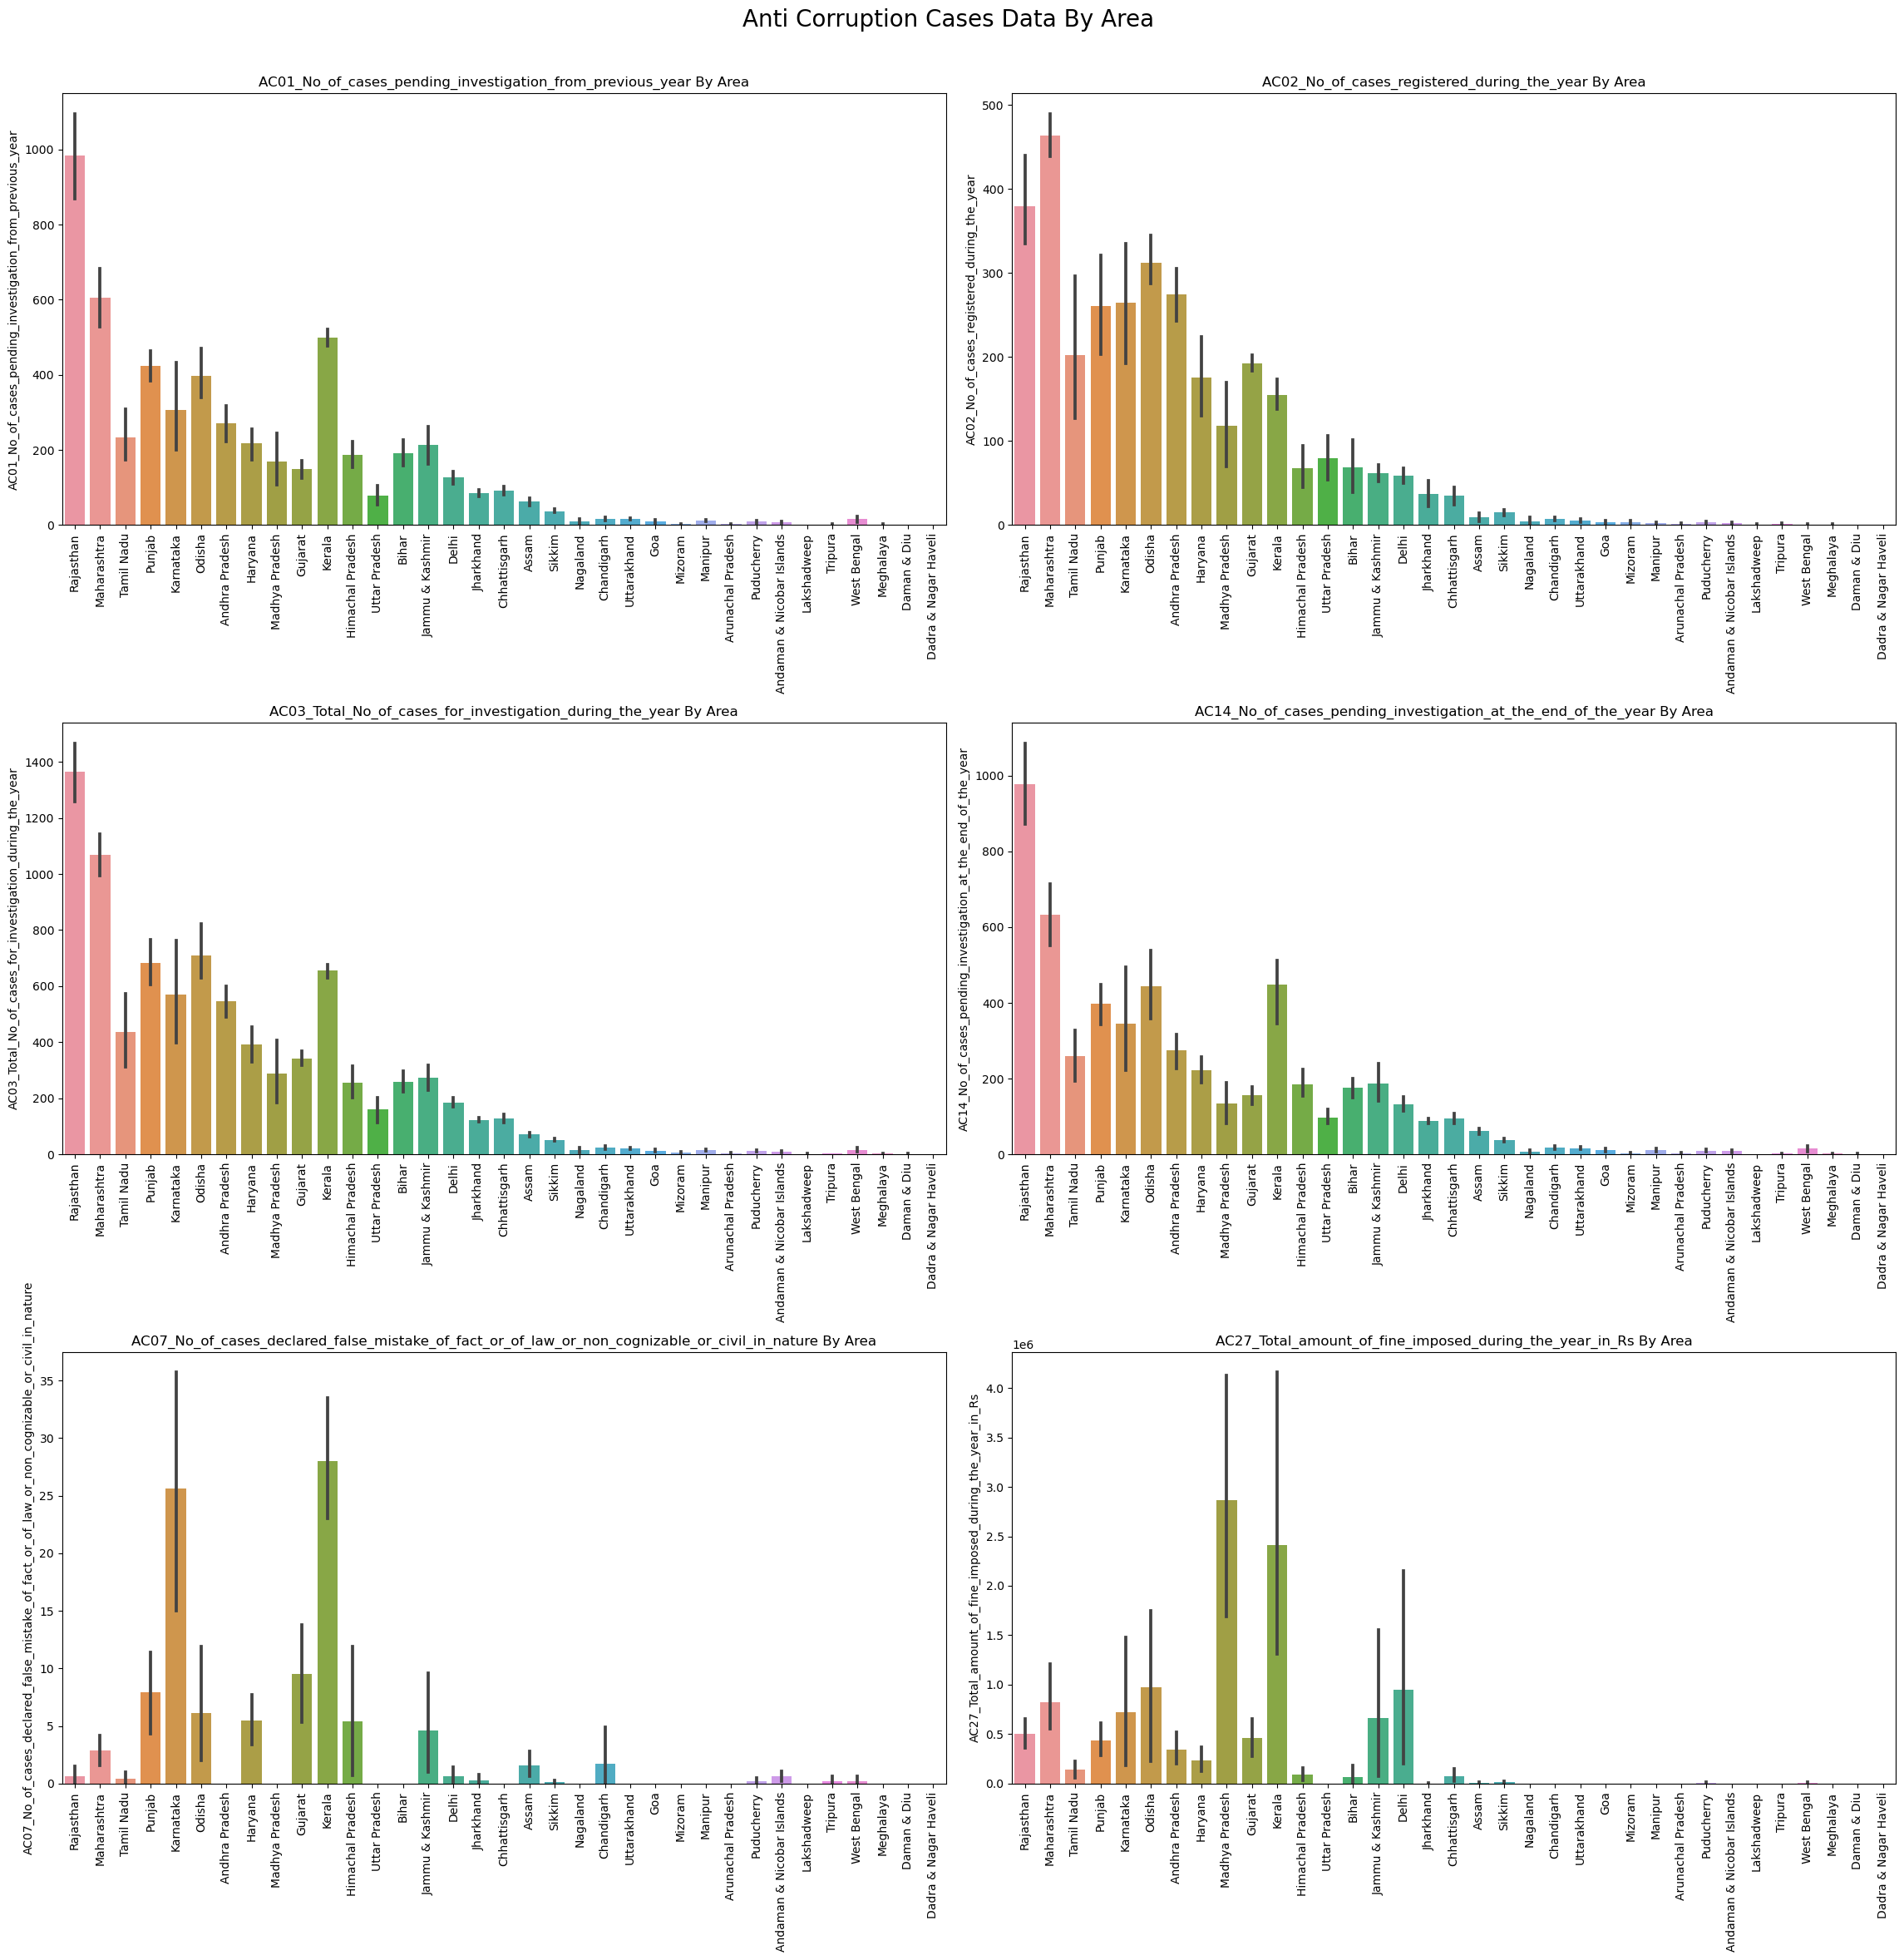

In [5]:
# List of crime categories
crime_categories = ['AC01_No_of_cases_pending_investigation_from_previous_year',
       'AC02_No_of_cases_registered_during_the_year',
       'AC03_Total_No_of_cases_for_investigation_during_the_year',
       'AC14_No_of_cases_pending_investigation_at_the_end_of_the_year',
       'AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature',
       'AC27_Total_amount_of_fine_imposed_during_the_year_in_Rs']

# Set up the number of rows and columns for subplots
num_rows = (len(crime_categories) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(23, 8 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each crime category
for idx, crime in enumerate(crime_categories):
    sns.barplot(data=anti_Corruption, x='ï»¿Area_Name', y=crime, ax=axes[idx])
    axes[idx].set_title(f'{crime} By Area')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(crime)
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty subplots
for i in range(len(crime_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
fig.suptitle('Anti Corruption Cases Data By Area ', fontsize=20)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect parameter to make space for the main title
plt.show()


1. **AC01_No_of_cases_pending_investigation_from_previous_year**:
   - The number of pending cases from the previous year fluctuates between 125 and 225, showing some variability but no clear increasing or decreasing trend over the observed period.

2. **AC02_No_of_cases_registered_during_the_year**:
   - The number of registered cases during the year varies between 60 and 160. There are noticeable peaks around 2002 and 2009, with a dip around 2004, indicating some fluctuation but an overall slight increase.

3. **AC03_Total_No_of_cases_for_investigation_during_the_year**:
   - The total number of cases for investigation during the year remains relatively stable with slight fluctuations, mostly staying within the 250 to 400 range, with a gradual increase towards the end of the period.

4. **AC14_No_of_cases_pending_investigation_at_the_end_of_the_year**:
   - The number of pending cases at the end of the year shows a general upward trend, starting around 150 in 2001 and reaching about 225 by 2010, indicating an accumulation of unresolved cases over time.

5. **AC16_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature**:
   - The number of cases declared as false or non-cognizable shows significant fluctuation, with a notable peak around 2005-2006 and another rise towards the end of the period.

6. **AC27_Total_amount_of_fine_imposed_during_the_year_in_Rs**:
   - The total amount of fines imposed shows an increasing trend with notable peaks around 2003, 2005, and 2009-2010. The variability in the fines imposed is higher towards the end of the period.

In summary, while some metrics show a relatively stable trend, others exhibit significant variability or a clear upward trend over the observed period.

### Summary Report: Insights from Sensitive and Peaceful Areas

#### Sensitive Areas Insights

**1. Impact of Specific Crimes:**
   - **Dowry Deaths:** High in Uttar Pradesh, Bihar, West Bengal.
   - **Hurt/Grievous Hurt:** Significant in Uttar Pradesh, Maharashtra, Madhya Pradesh.
   - **Importation of Girls:** Notable in Assam, indicating trafficking issues.
   - **Insult to Modesty of Women:** High in Maharashtra, West Bengal, Uttar Pradesh.
   - **Kidnapping and Abduction:** Prominent in Uttar Pradesh, Maharashtra, West Bengal.
   - **Murder:** High in Uttar Pradesh, Bihar, Maharashtra.
   - **Rape:** Significant in Rajasthan, Uttar Pradesh, Madhya Pradesh.
   - **Assault on Women:** High in Uttar Pradesh, Maharashtra, West Bengal.

**2. Recommendations to Reduce Crime:**
   - **Enhanced Law Enforcement:** Increase police presence and establish task forces.
   - **Community Engagement:** Involve local leaders, conduct awareness programs.
   - **Strengthening Legal Framework:** Implement stricter laws and fast-track courts.
   - **Improving Socio-Economic Conditions:** Address poverty, unemployment, and provide skill development.
   - **Support for Victims:** Establish support centers, helplines, and online portals.

**3. Most Safe and Unsafe Districts:**
   - **Unsafe Districts:** Uttar Pradesh, Maharashtra, West Bengal.
   
**4. High Incidence of Crimes Against Women:**
   - **Uttar Pradesh, Maharashtra, West Bengal.**

**5. Trends in Property Crimes:**
   - **Auto Theft:** High in Delhi, Maharashtra, Uttar Pradesh.
   - **Burglary:** Significant in Uttar Pradesh, Maharashtra, West Bengal.
   - **Cheating and Criminal Breach of Trust:** High in Maharashtra, Uttar Pradesh, Delhi.

**6. Violent Crimes Variability:**
   - **Murder and Attempt to Murder:** High in Uttar Pradesh, Bihar, Maharashtra.

**7. Economic Crimes:**
   - **High in Maharashtra, Delhi, Uttar Pradesh.**

**8. Arson Problem Areas:**
   - **Assam, West Bengal.**

**9. Steps to Address High Crime Incidence:**
   - **Focused Law Enforcement, Community Programs, Legislative Actions.**

**10. Crimes with Highest Variability:**
   - **Assault on Women, Kidnapping and Abduction, Rape.**

**11. Organized Crimes Comparison:**
   - **High in Uttar Pradesh and Maharashtra.**

**Conclusion:**
By identifying high-crime areas and understanding prevalent crime types, targeted measures can be implemented to reduce crime. Addressing socio-economic factors, enhancing law enforcement, and supporting victims are crucial for improving safety.

---

#### Peaceful Areas Insights

**1. Insult to Modesty of Women:**
   - **Highest in Maharashtra.**

**2. Cruelty by Husband or his Relatives:**
   - **Highest in Uttar Pradesh.**

**3. Importation of Girls from Foreign Countries:**
   - **Low prevalence in many states.**

**4. Death by Negligence:**
   - **Highest in Maharashtra; some states have negligible counts.**

**5. Other IPC Crimes:**
   - **High in Maharashtra, Uttar Pradesh.**

**6. Theft Cases:**
   - **Highest in Maharashtra.**

**7. Auto Theft:**
   - **Most common in Delhi.**

**8. Dowry Deaths:**
   - **Highest in Uttar Pradesh.**

**9. Assault on Women with Intent to Outrage Modesty:**
   - **High in Maharashtra, Uttar Pradesh.**

**10. Murder Cases:**
   - **Highest in Uttar Pradesh.**

**11. Kidnapping and Abduction of Women and Girls:**
   - **Highest in Uttar Pradesh.**

**12. Rape Cases:**
   - **Most reported in Madhya Pradesh.**

**13. Robbery Cases:**
   - **Highest in Maharashtra.**

**Conclusion:**
The analysis of peaceful areas highlights Maharashtra and Uttar Pradesh as significant in various crime categories. Despite being peaceful in some aspects, these states still face challenges with crimes against women and property crimes. Addressing these issues with focused interventions can further enhance the safety and security of these areas.